In [225]:
import numpy as np
import pylab as plt

In [214]:
R = np.array([ 
        [-1,-1,-1,-1,0,-1],
		[-1,-1,-1,0,-1,100],
		[-1,-1,-1,0,-1,-1],
		[-1,0,0,-1,0,-1],
		[-1,0,0,-1,-1,100],
		[-1,0,-1,-1,0,100] 
    ])

# Gamma (learning parameter).
gamma = 0.8
# Initial state. (Usually to be chosen at random)
initial_state = 1

In [215]:
print(R)

[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [ -1   0   0  -1  -1 100]
 [ -1   0  -1  -1   0 100]]


In [216]:
# Q matrix
Q =  np.matrix( np.zeros((6,6)) )
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [217]:
def available_actions(state):
    av_act = np.where( R[state] >= 0)[0]
    return av_act

In [218]:
available_act = available_actions(initial_state) 
print(available_act)

[3 5]


In [219]:
# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def calc_reward(current_state, action, gamma):
    max_index=np.argmax(Q[action], axis=1)
    max_value = Q[action, max_index]
    # Q learning formula
    return R[current_state, action] + gamma * max_value

In [220]:
# Update Q matrix
update(initial_state,action,gamma)

In [221]:
print(Q)
np.argmax(Q[0], axis=1)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


matrix([[0]], dtype=int64)

In [222]:
current_state = np.random.randint(0, int(Q.shape[0]))
print(current_state)
print(Q.shape[0])

4
6


In [223]:
scores=[]
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = np.random.choice(available_act)
    rw=calc_reward(current_state,action,gamma)
    Q[current_state, action] = rw
    score=np.sum(Q/np.max(Q)*100)
    scores.append(score)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

C:\Python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [224]:
current_state = 2
# current_state=0
goal_state=5
steps = [current_state]

while current_state != goal_state:
    next_step_index=np.argmax(Q[current_state], axis=1)
    steps.append( int( next_step_index) )
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

Selected path:
[2, 3, 1, 5]


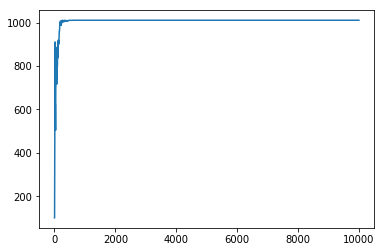

In [226]:
plt.plot(scores)
plt.show()